In [48]:
# 1
import numpy as np

data = [(160, 'F'), (165, 'F'), (155, 'F'), (172, 'F'), (175, 'B'), (180, 'B'), (177, 'B'), (190, 'B')]
intervals = [(150, 160), (161, 170), (171, 180), (181, 190)]

p_178, p_f, p_b, p_178_f, p_178_b = 0, 0, 0, 0, 0
for sample in data:
    if sample[1] == 'F':
        p_f += 1
        if 171 <= sample[0] <= 180:
            p_178 += 1
            p_178_f += 1
    elif sample[1] == 'B':
        p_b += 1
        if 171 <= sample[0] <= 180:
            p_178 += 1
            p_178_b += 1

p_178_f /= p_f
p_178_b /= p_b 
p_178 /= len(data)
p_f /= len(data)
p_b /= len(data)

p_f_178 = p_178_f * p_f / p_178
p_b_178 = p_178_b * p_b / p_178
print('probabilitate fata data fiind inaltimea 178 =', p_f_178)
print('probabilitate baiat data fiind inaltimea 178 =', p_b_178)

probabilitate fata data fiind inaltimea 178 = 0.25
probabilitate baiat data fiind inaltimea 178 = 0.75


In [58]:
# 2
train_images = np.loadtxt('data_MNIST/data/train_images.txt')
train_labels = np.loadtxt('data_MNIST/data/train_labels.txt', 'int')
test_images = np.loadtxt('data_MNIST/data/test_images.txt')
test_labels = np.loadtxt('data_MNIST/data/test_labels.txt', 'int')

def values_to_bins(values, bins):
    return np.subtract(np.digitize(values, bins), 1)

def get_disc(images, num_bins):
    bins = np.linspace(start=0, stop=256, num=num_bins)   
    return values_to_bins(images, bins)

disc_train_images = get_disc(train_images, 5)
disc_test_images = get_disc(test_images, 5)

C:\Users\anama\AppData\Local\Temp\ipykernel_25796\2608272087.py:3: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  train_labels = np.loadtxt('data_MNIST/data/train_labels.txt', 'int')
C:\Users\anama\AppData\Local\Temp\ipykernel_25796\2608272087.py:5: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)`

In [50]:
# 3
from sklearn.naive_bayes import MultinomialNB
    
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(disc_train_images, train_labels)
naive_bayes_model.predict(disc_test_images)
print('acuratete pt num_bins 5 =', naive_bayes_model.score(disc_test_images, test_labels))

acuratete pt num_bins 5 = 0.836


In [59]:
# 4
num_bins = [3, 5, 7, 9, 11]
for num_bin in num_bins:
    disc_train_images = get_disc(train_images, num_bin)
    disc_test_images = get_disc(test_images, num_bin)
    
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(disc_train_images, train_labels)
    naive_bayes_model.predict(disc_test_images)
    print('acuratete pt num_bins {} = {}'.format(num_bin, naive_bayes_model.score(disc_test_images, test_labels)))

acuratete pt num_bins 3 = 0.83
acuratete pt num_bins 5 = 0.836
acuratete pt num_bins 7 = 0.842
acuratete pt num_bins 9 = 0.842
acuratete pt num_bins 11 = 0.842


In [77]:
# 6
def calculate_confusion_matrix(y_true, y_pred):
    matrix = [[0] * 10 for _ in range(10)]
    for i in range(len(y_true)):
        matrix[y_true[i]][y_pred[i]] += 1
    return matrix

In [78]:
from sklearn.metrics import confusion_matrix as cm

num_bins = 9
disc_train_images = get_disc(train_images, num_bins)
disc_test_images = get_disc(test_images, num_bins)
    
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(disc_train_images, train_labels)
y_pred = naive_bayes_model.predict(disc_test_images)
y_true = test_labels
confusion_matrix = calculate_confusion_matrix(y_true, y_pred)
confusion_matrix_2 = cm(y_true, y_pred)

for line in confusion_matrix:
    print(line)
print()
for line in confusion_matrix_2:
    print(line)

[51, 0, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 48, 0, 0, 0, 0, 0, 0, 4, 0]
[2, 0, 51, 1, 1, 0, 0, 1, 1, 1]
[0, 0, 1, 49, 0, 0, 0, 0, 0, 3]
[0, 0, 0, 0, 34, 0, 0, 0, 2, 10]
[1, 0, 0, 9, 0, 35, 1, 0, 5, 1]
[1, 1, 0, 0, 1, 0, 43, 0, 2, 0]
[0, 1, 0, 0, 2, 0, 0, 41, 0, 6]
[0, 1, 3, 3, 1, 1, 1, 1, 34, 1]
[0, 0, 1, 1, 5, 0, 0, 0, 0, 35]

[51  0  0  0  0  0  1  0  1  0]
[ 0 48  0  0  0  0  0  0  4  0]
[ 2  0 51  1  1  0  0  1  1  1]
[ 0  0  1 49  0  0  0  0  0  3]
[ 0  0  0  0 34  0  0  0  2 10]
[ 1  0  0  9  0 35  1  0  5  1]
[ 1  1  0  0  1  0 43  0  2  0]
[ 0  1  0  0  2  0  0 41  0  6]
[ 0  1  3  3  1  1  1  1 34  1]
[ 0  0  1  1  5  0  0  0  0 35]


In [79]:
# 5
conf_max = 0
x, y = 0, 0
for i in range(len(confusion_matrix)):
    for j in range(i + 1, len(confusion_matrix[i])):
        if confusion_matrix[i][j] + confusion_matrix[j][i] > conf_max:
            conf_max = confusion_matrix[i][j] + confusion_matrix[j][i]
            x = i
            y = j
print('cea mai confuzata pereche =', x, y)

cea mai confuzata pereche = 4 9


pred = 8, true = 5


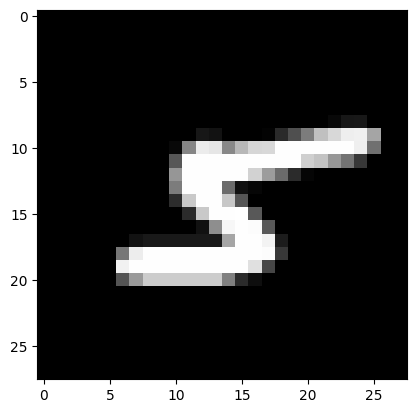

pred = 0, true = 6


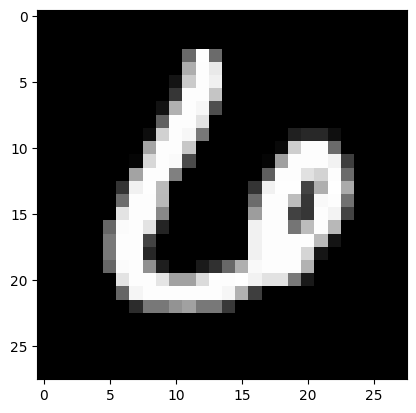

pred = 9, true = 4


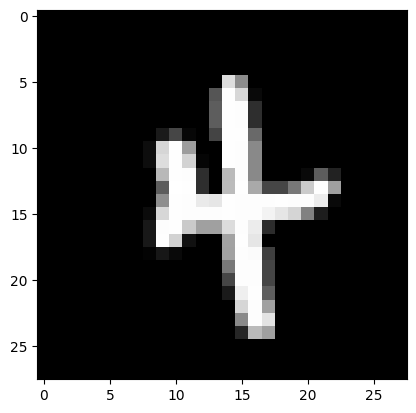

pred = 9, true = 7


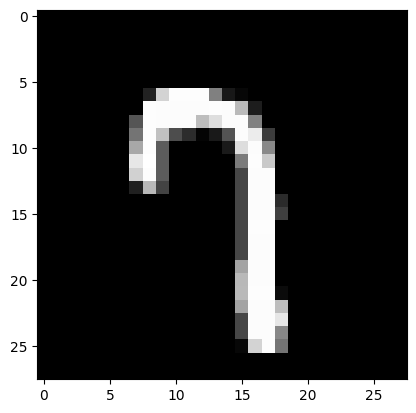

pred = 3, true = 2


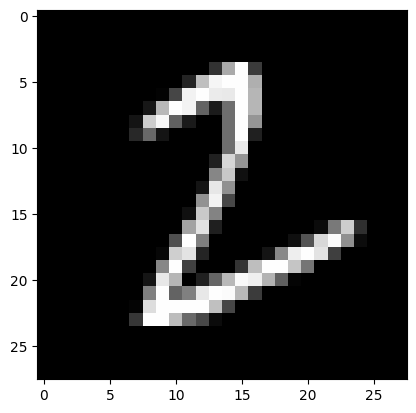

pred = 8, true = 1


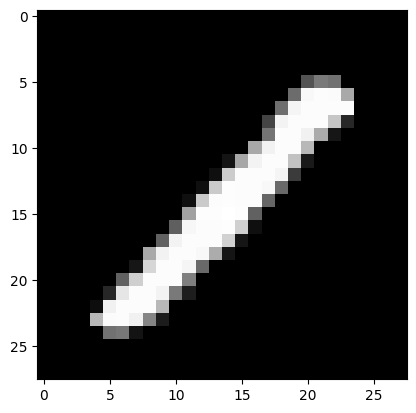

pred = 9, true = 3


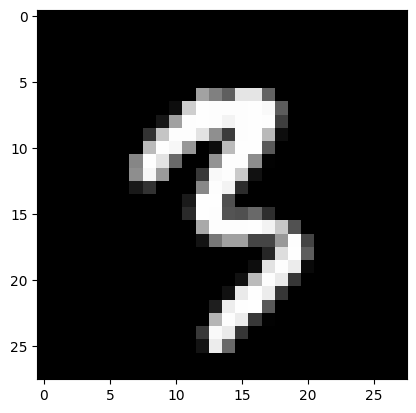

pred = 8, true = 1


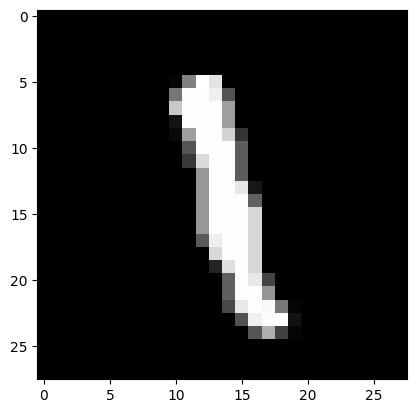

pred = 8, true = 6


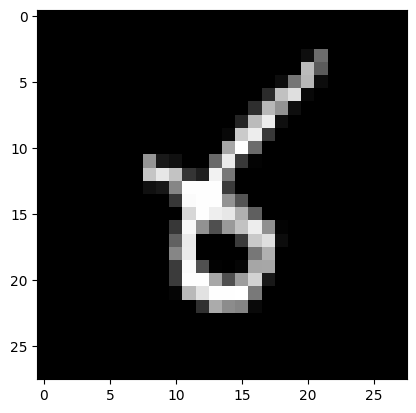

pred = 4, true = 9


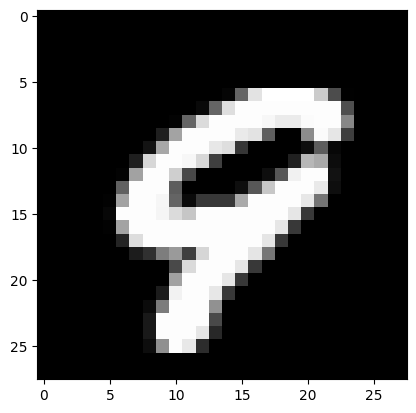

In [84]:
from matplotlib import pyplot as plt

n = 0
for i in range(len(y_pred)):
    if y_pred[i] != y_true[i]:
        print('pred = {}, true = {}'.format(y_pred[i], y_true[i]))
        image = test_images[i]
        image = np.reshape(image, (28, 28))
        plt.imshow(image.astype(np.uint8), cmap='gray')
        plt.show()
        
        n += 1
        if n == 10:
            break